In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('glassdoorjobs_cleaned.csv')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,per_hour,company_name,jobs_state,company_age,python_ys,sql_ys,excel_ys,spark_ys,r_ys,same_state
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\r\nLocation: Albuquerque, NM\...",3.8,Tecolote Research\r\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,Tecolote Research,NM,47,1,0,1,0,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\r\n\r\r\nI. General Summar...,3.4,University of Maryland Medical System\r\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,University of Maryland Medical System,MD,36,1,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,KnowBe4,FL,10,1,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\r\nJob ID: 310709...,3.8,PNNL\r\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,PNNL,WA,55,1,0,0,0,0,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\r\nAffinity Solutions / Marke...,2.9,Affinity Solutions\r\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,Affinity Solutions,NY,22,1,1,1,0,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'per_hour', 'company_name', 'jobs_state', 'company_age', 'python_ys',
       'sql_ys', 'excel_ys', 'spark_ys', 'r_ys', 'same_state'],
      dtype='object')

# Some more data cleaning

In [6]:
def simplified_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    

def seniority_level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'principal' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
        

In [7]:
#job title and seniority
df['simplified_title'] = df['Job Description'].apply(simplified_title)
df['seniority'] = df['Job Description'].apply(seniority_level)

In [8]:
# fix state los angeles
df.jobs_state = df.jobs_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA' )

In [9]:
# job description length
df['desc_length'] = df['Job Description'].apply(lambda x: len(x))

In [10]:
# competitor count
df['no_of_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x!='-1' else 0 )

In [11]:
# hourly wage to annual
df.min_salary = df.apply(lambda x: x['min_salary']*2 if x['per_hour']==1 else x['min_salary'], axis=1)
df.max_salary = df.apply(lambda x: x['max_salary']*2 if x['per_hour']==1 else x['max_salary'], axis=1)
# update avg salary
df.avg_salary = (df.min_salary+df.max_salary)/2

# Data Insights

In [12]:
df.describe()

,Rating,Founded,employer_provided,min_salary,max_salary,avg_salary,per_hour,company_age,python_ys,sql_ys,excel_ys,spark_ys,r_ys,same_state,desc_length,no_of_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.022911,74.719677,128.149596,101.434636,0.032345,46.591644,0.528302,0.512129,0.522911,0.225067,0.001348,0.557951,3950.799191,1.053908
std,0.801210,497.183763,0.149721,30.980593,45.220324,37.546122,0.177034,53.778815,0.499535,0.500190,0.499812,0.417908,0.036711,0.496965,1546.291385,1.384239
min,-1.000000,-1.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2864.750000,0.000000
50%,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,0.000000,24.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3808.000000,0.000000
75%,4.000000,2007.000000,0.000000,91.000000,155.000000,122.500000,0.000000,59.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4810.000000,3.000000
max,5.000000,2019.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10241.000000,4.000000


In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'per_hour', 'company_name', 'jobs_state', 'company_age', 'python_ys',
       'sql_ys', 'excel_ys', 'spark_ys', 'r_ys', 'same_state',
       'simplified_title', 'seniority', 'desc_length', 'no_of_comp'],
      dtype='object')

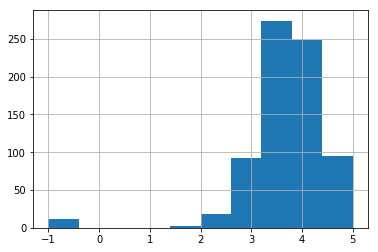

In [14]:
df['Rating'].hist()
#approx normal distribution

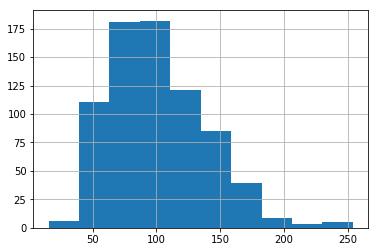

In [15]:
df.avg_salary.hist();
#approx normal distribution, ;-so that matplot obj is not returned only graph is shown

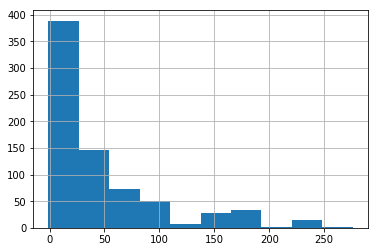

In [16]:
df.company_age.hist()
#aprrox expo graph

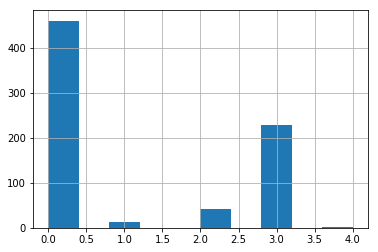

In [17]:
df.no_of_comp.hist()
#pprox discrete graph

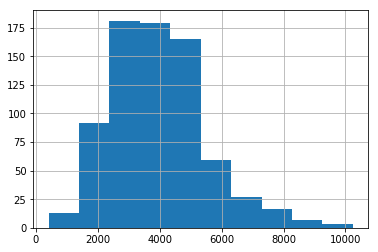

In [18]:
df.desc_length.hist()
#approx normal distribution

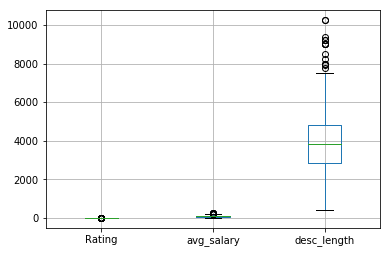

In [19]:
df[['Rating','avg_salary','desc_length']].boxplot()

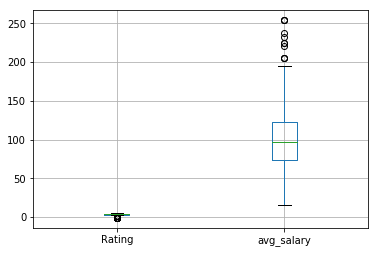

In [20]:
df[['Rating','avg_salary']].boxplot()

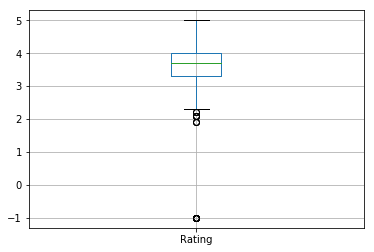

In [21]:
df[['Rating']].boxplot()

In [22]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'salary', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'per_hour', 'company_name', 'jobs_state', 'company_age', 'python_ys',
       'sql_ys', 'excel_ys', 'spark_ys', 'r_ys', 'same_state',
       'simplified_title', 'seniority', 'desc_length', 'no_of_comp'],
      dtype='object')

In [23]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'jobs_state','same_state', 'python_ys', 'r_ys',
       'spark_ys', 'sql_ys', 'excel_ys', 'simplified_title', 'seniority']]

Graph for Location: Total = 200


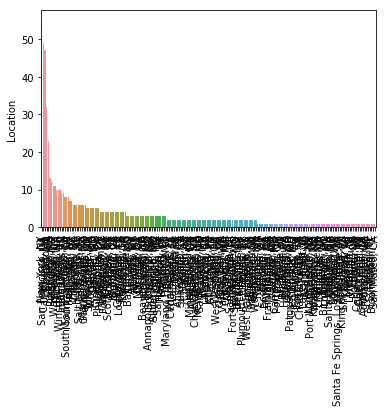

Graph for Headquarters: Total = 198


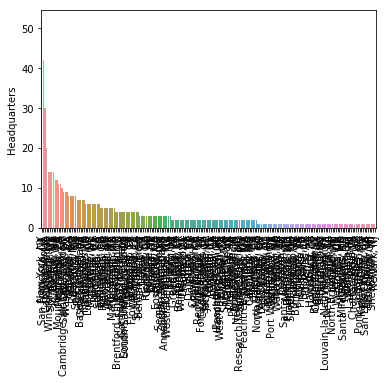

Graph for Size: Total = 9


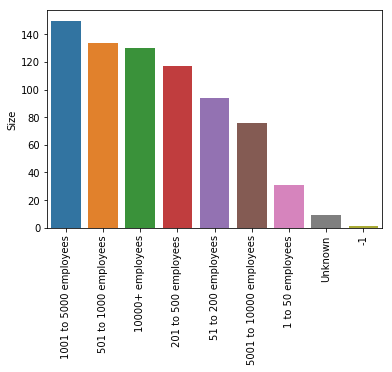

Graph for Type of ownership: Total = 11


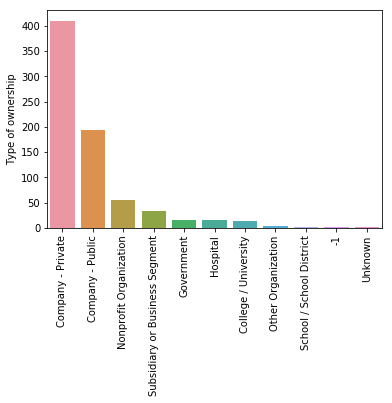

Graph for Industry: Total = 60


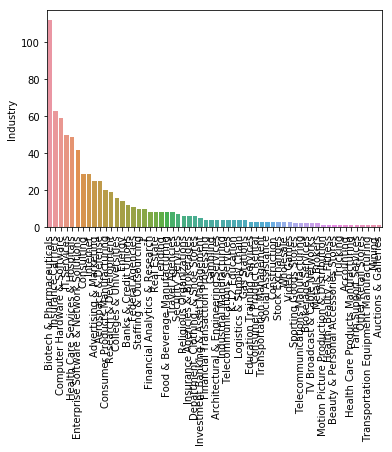

Graph for Sector: Total = 25


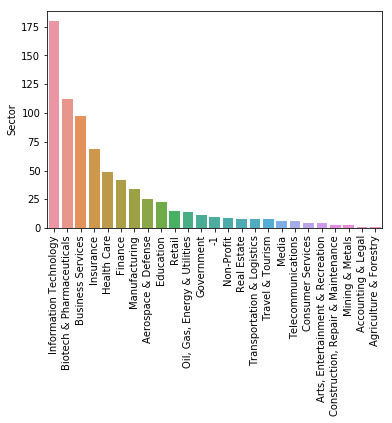

Graph for Revenue: Total = 14


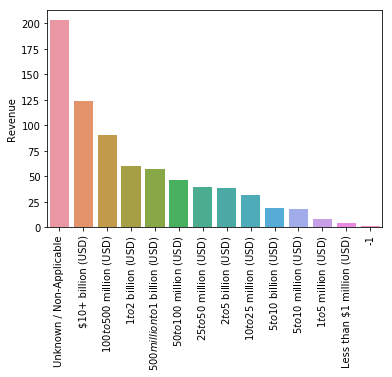

Graph for company_name: Total = 343


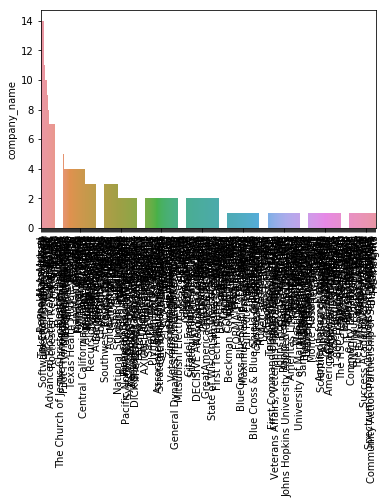

Graph for jobs_state: Total = 37


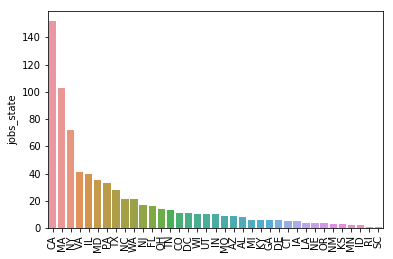

Graph for same_state: Total = 2


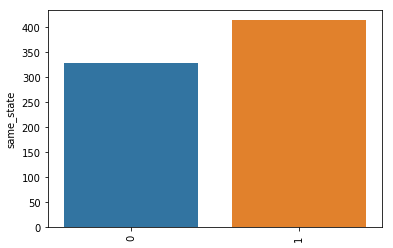

Graph for python_ys: Total = 2


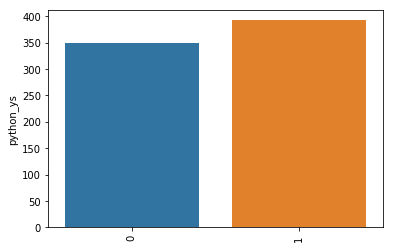

Graph for r_ys: Total = 2


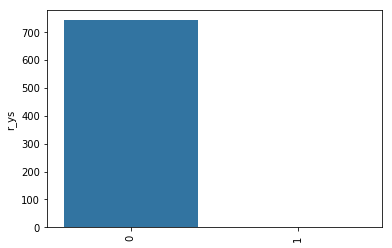

Graph for spark_ys: Total = 2


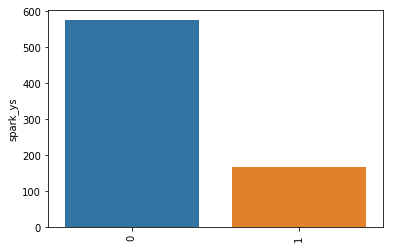

Graph for sql_ys: Total = 2


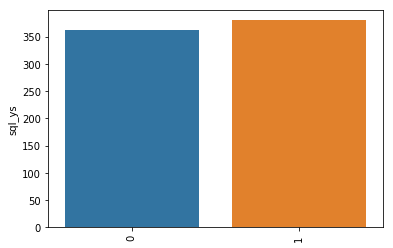

Graph for excel_ys: Total = 2


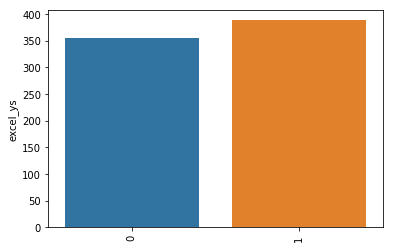

Graph for simplified_title: Total = 6


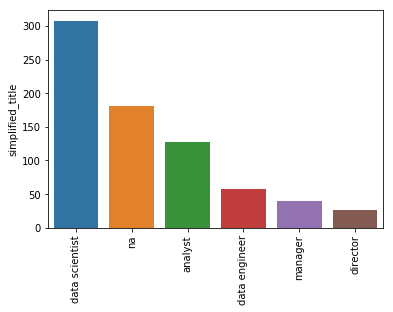

Graph for seniority: Total = 3


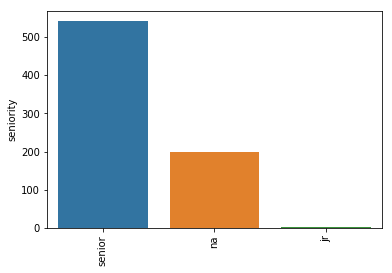

In [24]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: Total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


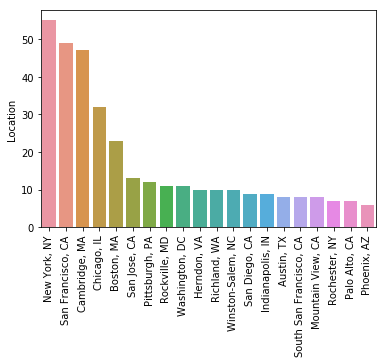

graph for Headquarters: total = 20


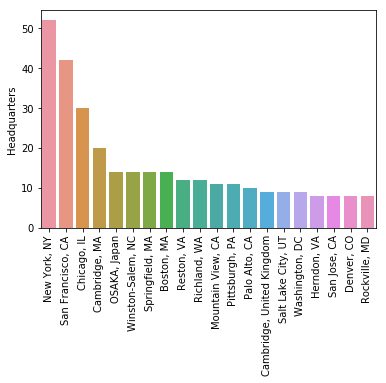

graph for Industry: total = 20


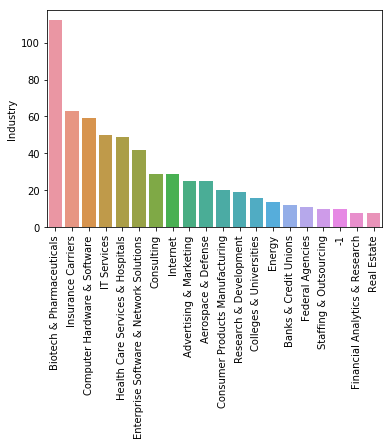

graph for company_name: total = 20


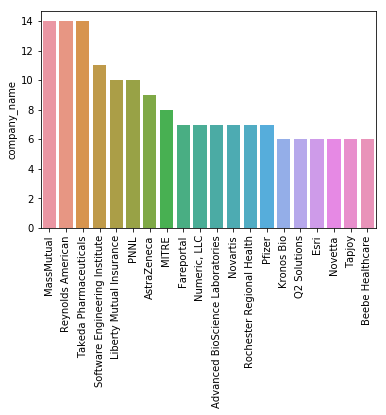

In [25]:
#some of the graph are not clear due more values hence analyzing top 20 of them
for i in df_cat[['Location','Headquarters','Industry','company_name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
pd.pivot_table(df, index = ['simplified_title','seniority'], values = 'avg_salary')

avg_salary
simplified_title seniority            
analyst          na          71.951613
                 senior      78.932990
data engineer    na          95.263158
                 senior     112.000000
data scientist   jr          84.000000
                 na         110.358974
                 senior     119.313596
director         na          54.000000
                 senior      92.347826
manager          na          99.500000
                 senior      90.527778
na               na          81.645161
                 senior     102.193277

In [27]:
pd.pivot_table(df, index = ['jobs_state','simplified_title'], values = 'avg_salary')

avg_salary
jobs_state simplified_title            
AL         analyst            62.200000
           data engineer      65.000000
           data scientist     48.000000
           na                 39.500000
AZ         analyst            55.000000
           data engineer      65.833333
           data scientist    106.166667
           na                100.000000
CA         analyst            87.470588
           data engineer     142.000000
           data scientist    142.142857
           director           85.000000
           manager            62.500000
           na                119.978261
CO         analyst            29.500000
           data engineer      99.000000
           data scientist    108.666667
           na                 72.375000
CT         data scientist     84.000000
           na                 62.500000
DC         analyst            64.500000
           data engineer      87.000000
           data scientist    153.200000
           na                101.000000
DE         na                 55.000000
FL         analyst            40.750000
           data engineer      91.833333
           data scientist     79.928571
           na                122.000000
GA         analyst            85.000000
...                                 ...
PA         data scientist    109.625000
           manager            95.500000
           na                104.318182
RI         na                100.000000
SC         na                 60.500000
TN         analyst            64.750000
           data engineer     109.000000
           data scientist     92.000000
           na                 99.700000
TX         analyst           149.500000
           data engineer      82.125000
           data scientist    107.071429
           manager            87.500000
           na                 53.571429
UT         analyst            54.750000
           data engineer     100.333333
           data scientist    140.500000
VA         analyst            77.583333
           data engineer     102.000000
           data scientist    106.473684
           manager            77.500000
           na                 83.928571
WA         analyst            54.500000
           data scientist    111.318182
           director           80.900000
           manager            67.000000
           na                 97.500000
WI         analyst            83.300000
           data scientist    100.500000
           director           54.000000

[121 rows x 1 columns]

In [28]:
df.to_csv('eda_cleaned_data.csv')

In [30]:
df[['min_salry,max_salary']]

KeyError: "['min_salry,max_salary'] not in index"